In [442]:
import os
size = 65
# result_folder = "results_65/prompt_ToMh"
# result_folder = 'API_responses'
result_folder = 'result_gpt-3.5-turbo-v0'
ans_folder = "data_ToMh_old"
acc = {}

def correct(result, choice, ans):
    if ans in result.lower() or choice in result:
        return 1
    return 0

# Iterate over all files and subdirectories within the root folder
for folder_name, subfolders, filenames in os.walk(result_folder):
    for filename in filenames:
        if filename.endswith(".txt"):
                ans_folder_name = folder_name.replace(result_folder, ans_folder)
                
                with open(os.path.join(ans_folder_name, filename), "r") as f:
                    output = f.read()
                    ans = output[output.find('Answer: '):]
                    ans = ans[:ans.find('\n')]
                    ans = ans.split()[-1]
                    choice = output[output.find('Choices:'):]
                    choice = choice[choice.find(ans)-3]
                    ans = ans.replace('_',' ')

                with open(os.path.join(folder_name, filename), "r") as f:
                    result = f.read()
                    result = result[-60:]
                    result = result.replace('_',' ')
                    choice_exist = result.find(choice)
                    acc_path  = os.path.join(folder_name, filename).replace(result_folder,'')
                    
                acc[acc_path] = correct(result, choice, ans)

In [444]:
# joint acc
for key, value in acc.items():
    if value == 0:
        index = 2+key.find('r_')
        o = int(key[index]) + 1
        for i in range(o, 5):
            # print('r_'+key[index])
            new_k = key.replace('r_'+key[index], 'r_'+str(i))
            # print(key, new_k)
            acc[new_k] = 0

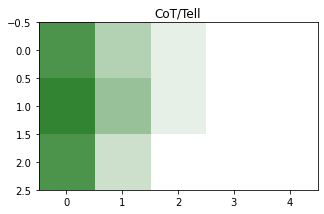

0.22000000000000006


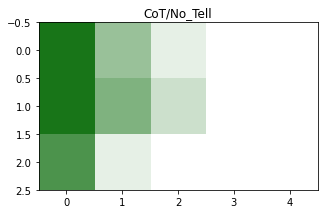

0.25333333333333335


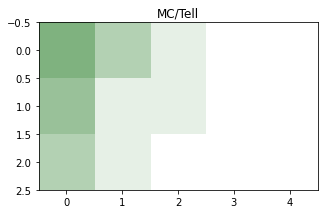

0.12666666666666668


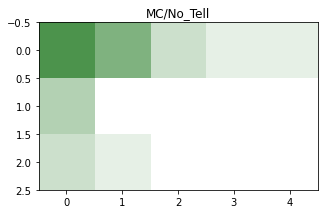

0.14666666666666667


In [445]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
def plot(data, title):
    # Create one subplots
    fig, axs = plt.subplots(1, 1, figsize=(5, 5))

    # Create a custom colormap from green (1) to white (0)
    colors = [(1, 1, 1),(0, 0.4, 0)]
    cmap = LinearSegmentedColormap.from_list('darkgreen_to_white', colors)

    # Plot the first figure
    axs.imshow(data, cmap=cmap, interpolation='nearest', vmin=0, vmax=1)
    axs.set_title(title)

    # Show the figures
    plt.show()

def get_acc(check_list):
    cnt = 0
    cor = 0
    for key, value in acc.items():
        if all([i in key for i in check_list]):
            cnt += 1
            cor += value
    return round(cor / (cnt+0.01), 1)

import numpy as np
for i in ['CoT', 'MC']:
    for j in ['Tell', 'No_Tell']:
        data = np.zeros((3,5))
        for k in range(5):
            for l in range(3):
                # print(data[l][k])
                o = 'order_{}'.format(k)
                len = 'length_{}'.format(l+1)
                data[l][k] = get_acc([i, j, o, len])
        plot(data, i+'/'+j)
        print(data.mean())